In [11]:
import pandas as pd

bs = pd.read_csv("day.csv", parse_dates = ["dteday"])

In [12]:
bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [13]:
bs["cnt"].value_counts()

5409    2
2424    2
5698    2
4459    2
5119    2
       ..
5046    1
4713    1
4763    1
4785    1
2729    1
Name: cnt, Length: 696, dtype: int64

In [14]:
bs["cnt"].value_counts(bins = 10).sort_index()

(13.307, 891.2]      13
(891.2, 1760.4]      62
(1760.4, 2629.6]     71
(2629.6, 3498.8]     73
(3498.8, 4368.0]    122
(4368.0, 5237.2]    137
(5237.2, 6106.4]     81
(6106.4, 6975.6]     76
(6975.6, 7844.8]     79
(7844.8, 8714.0]     17
Name: cnt, dtype: int64

* The unique values are now number intervals. `(4368.0, 5237.2]` is a number interval.
* The `(` character indicates that the starting number is not included, 
* while the `]` indicates that the ending number is included. 
* The interval `(4368.0, 5237.2]` contains all numbers greater than 4368.0 and less than or equal to 5237.2.

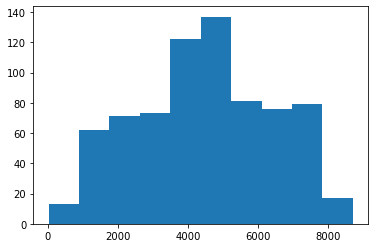

In [15]:
import matplotlib.pyplot as plt

plt.hist(bs["cnt"])
plt.show()

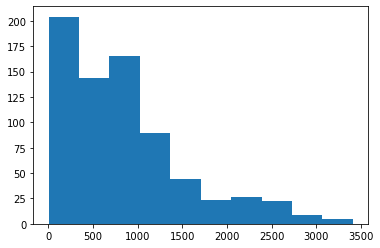

In [16]:
plt.hist(bs["casual"])
plt.show()

Notice that the two histograms have different shapes:

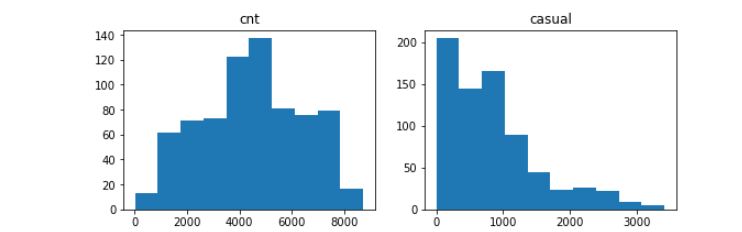

It's useful to examine the shape of a histogram because it shows us the distribution of the values.

We often see histograms with a shape that is more or less symmetrical. If we draw a vertical line exactly in the middle of a symmetrical histogram, then we divide the histogram in two halves that are mirror images of one another.

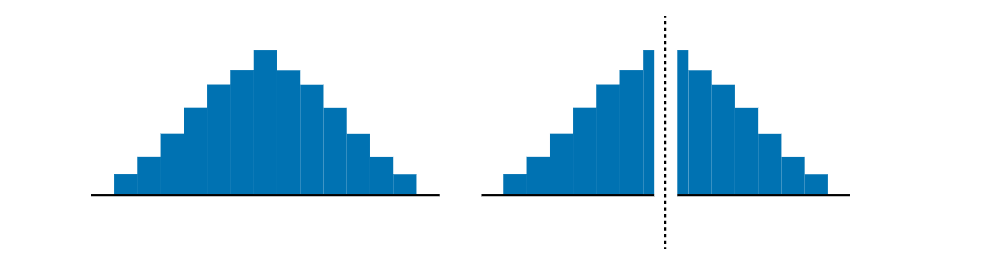

A histogram shows the distribution of the values, and if its shape is symmetrical, then we say we have a **symmetrical distribution**.

One common symmetrical distribution is the **normal distribution** (also called **Gaussian distribution**).

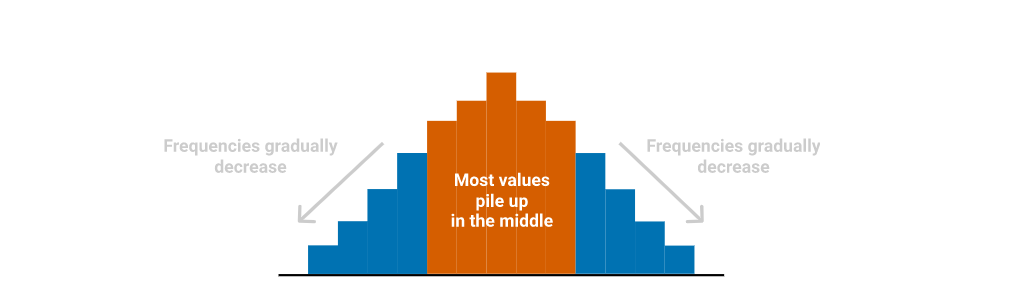

Numerical column (like the `cnt` column) has a minimum value, a maximum value, and a range (the range is the difference between the maximum and the minimum values). If we plot a histogram for this column and the visual result is a normal distribution, then this means the following:

-   Most of the values in that column lie in the middle of the range.
-   As we approach the minimum and the maximum points of the range, we have less and less of those values.

To better understand what a normal distribution means, let's say we plotted a histogram with the grades students earned on a math test. If the histogram shows a normal distribution, then this means the following:

-   Most of the student performances were average (lying somewhere in the middle between the minimum and the maximum marks).
-   As we approach the minimum and maximum marks, we have less and less students with those performances.

The normal distribution as an example of a symmetrical distribution.

Another symmetrical distribution we can see in practice is the **uniform distribution** — the values are *uniformly distributed*. The bars have equal height because the intervals have equal frequencies.

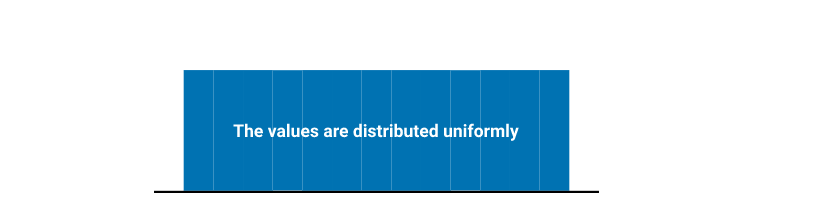

If we plotted a histogram for the grades students earned on a math test, and the distribution is uniform, this means that all the marks (or the mark intervals) have the same frequency.

When we plot histograms in practice, we rarely see perfectly symmetrical distributions. However, these ideal cases serve as a baseline to help us describe and interpret the distributions we see in practice.

For instance, if we look at the histograms for the `cnt` and the `registered` columns, we can say they look similar to a normal distribution. This immediately tells us that most values lie in the middle, and the frequencies gradually decrease toward the extremities.

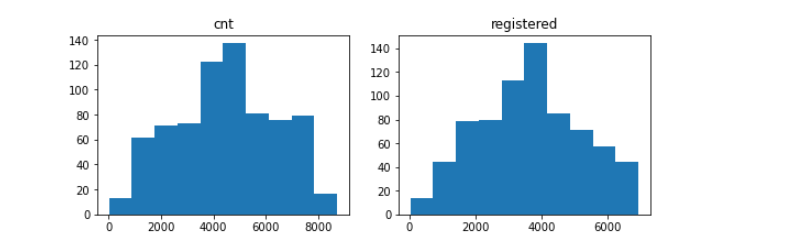

Not all histogram shapes are symmetrical though. The histogram of the `casual` column, for instance, shows a cluster of tall bars located on the left side of the x-axis.

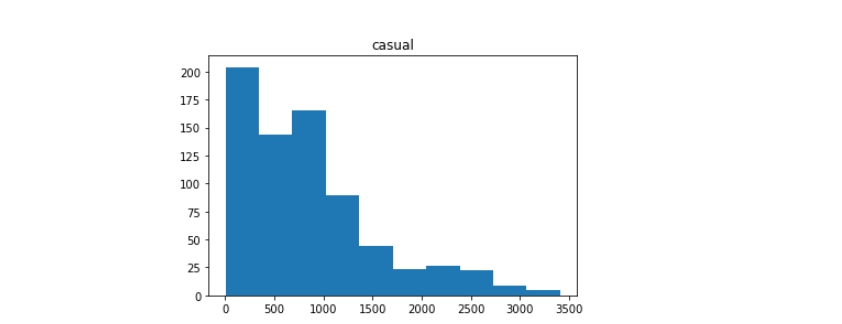

The `casual` histogram shows a **skewed distribution**. In a skewed distribution, we see the following:

-   The values pile up toward the end or the starting point of the range, making up the *body* of the distribution.
    -   In the case of the `casual` histogram, the values pile up toward the starting point of the range.
-   Then the values decrease in frequency towards the opposite end, forming the *tail* of the distribution.

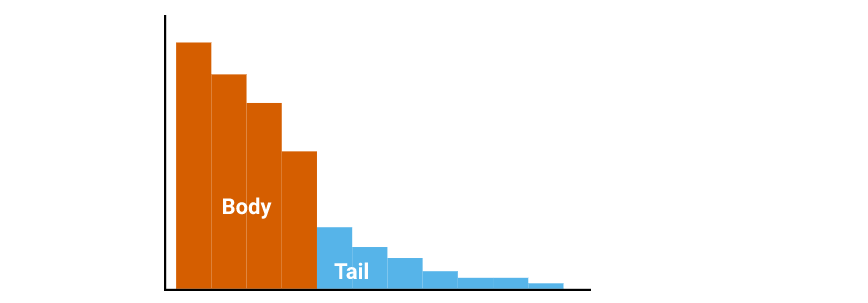

If the tail points to the right, then the distribution is right skewed (the distribution of the `casual` column is right skewed). If the tail points to the left, then the distribution is said to be left skewed.

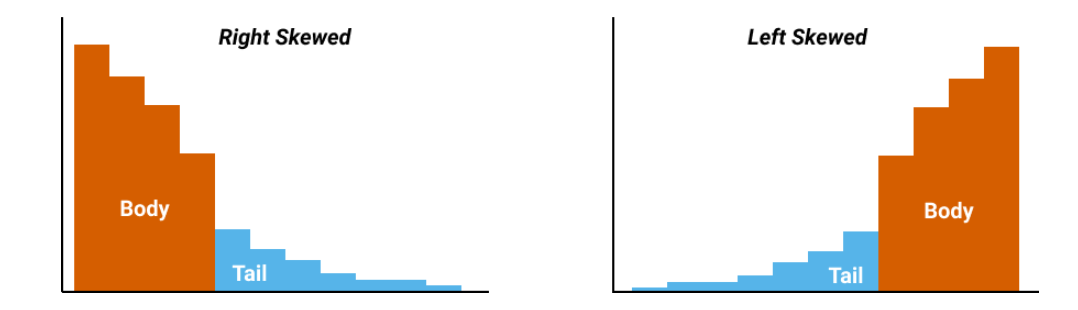

When the tail points to the left, it also points in the direction of negative numbers (on the x-axis, the numbers decrease from right to left). For this reason, a left-skewed distribution is sometimes also said to have a negative skew.

When the tail points to the right, it also points in the direction of positive numbers. As a consequence, right-skewed distributions are also said to have a positive skew.

In [17]:
norm_reviews = pd.read_csv("scores.csv", usecols = ["FILM", "RT_user_norm", 
                                                    "Metacritic_user_nom", "IMDB_norm", 
                                                    "Fandango_Ratingvalue"])

norm_reviews.head()

,FILM,Fandango_Ratingvalue,RT_user_norm,Metacritic_user_nom,IMDB_norm
0,Avengers: Age of Ultron (2015),4.5,4.3,3.55,3.90
1,Cinderella (2015),4.5,4.0,3.75,3.55
2,Ant-Man (2015),4.5,4.5,4.05,3.90
3,Do You Believe? (2015),4.5,4.2,2.35,2.70
4,Hot Tub Time Machine 2 (2015),3.0,1.4,1.70,2.55


In [22]:
# norm_reviews["Fandango_Ratingvalue"].value_counts().sort_index().size
norm_reviews["Fandango_Ratingvalue"].value_counts().sort_index()

2.7     2
2.8     2
2.9     5
3.0     4
3.1     3
3.2     5
3.3     4
3.4     9
3.5     9
3.6     8
3.7     9
3.8     5
3.9    12
4.0     7
4.1    16
4.2    12
4.3    11
4.4     7
4.5     9
4.6     4
4.8     3
Name: Fandango_Ratingvalue, dtype: int64

In [23]:
# norm_reviews["IMDB_norm"].value_counts().sort_index().size
norm_reviews["IMDB_norm"].value_counts().sort_index()

2.00     1
2.10     1
2.15     1
2.20     1
2.30     2
2.45     2
2.50     1
2.55     1
2.60     2
2.70     4
2.75     5
2.80     2
2.85     1
2.90     1
2.95     3
3.00     2
3.05     4
3.10     1
3.15     9
3.20     6
3.25     4
3.30     9
3.35     7
3.40     1
3.45     7
3.50     4
3.55     7
3.60    10
3.65     5
3.70     8
3.75     6
3.80     3
3.85     4
3.90     9
3.95     2
4.00     1
4.05     1
4.10     4
4.15     1
4.20     2
4.30     1
Name: IMDB_norm, dtype: int64

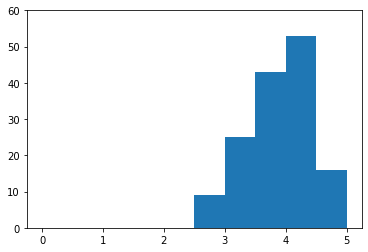

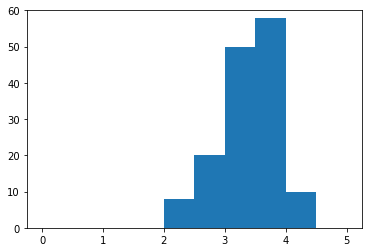

0.25

In [36]:
fig, ax = plt.subplots()

ax.hist(norm_reviews["Fandango_Ratingvalue"], range = (0,5))
ax.set_ylim(0,60)
plt.show()


# plt.hist(norm_reviews["IMDB_norm"], range = (0,5), bins = 20)
plt.hist(norm_reviews["IMDB_norm"], range = (0,5))
plt.ylim(0,60)
plt.show()

5/20

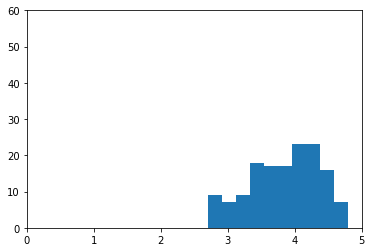

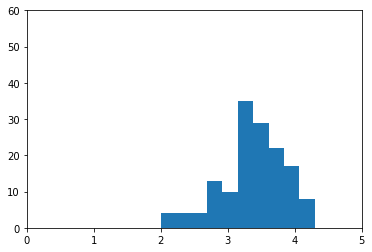

0.25

In [38]:
fig, ax = plt.subplots()

ax.hist(norm_reviews["Fandango_Ratingvalue"], bins = 10 )
ax.set_ylim(0,60)
ax.set_xlim(0,5)
plt.show()


# plt.hist(norm_reviews["IMDB_norm"], range = (0,5), bins = 20)
plt.hist(norm_reviews["IMDB_norm"], bins = 10)
plt.xlim(0,5)
plt.ylim(0,60)
plt.show()

5/20

In [39]:
# fig = plt.subplot()

# ax1 = fig.add_subplot(4,1,1)

In [40]:
norm_reviews["Fandango_Ratingvalue"].describe()

count    146.000000
mean       3.845205
std        0.502831
min        2.700000
25%        3.500000
50%        3.900000
75%        4.200000
max        4.800000
Name: Fandango_Ratingvalue, dtype: float64

In [48]:
norm_reviews["Fandango_Ratingvalue"].sort_values().reset_index(drop = True)[73]

3.9

In [47]:
146*.5


73.0

In [49]:
# quartiles

<!-- whisker and box plot -->

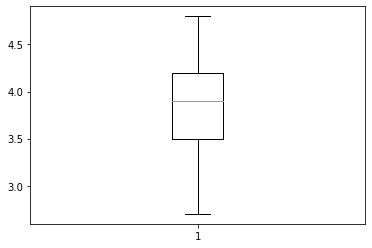

In [51]:
fig, ax = plt.subplots()

ax.boxplot(norm_reviews["Fandango_Ratingvalue"])
plt.show()

In [52]:
norm_reviews.columns

Index(['FILM', 'Fandango_Ratingvalue', 'RT_user_norm', 'Metacritic_user_nom',
       'IMDB_norm'],
      dtype='object')

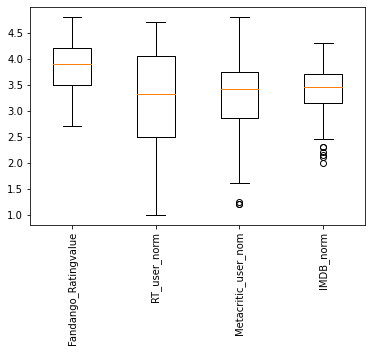

In [58]:
c = ['Fandango_Ratingvalue', 'RT_user_norm', 'Metacritic_user_nom',
       'IMDB_norm']

plt.boxplot(norm_reviews[c].values)
plt.xticks([1,2,3,4], c,  rotation = 90)
plt.show()